In [2]:
import sklearn
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from PIL import Image
from matplotlib import pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import Perceptron
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
layers = np.arange(0,12)
feature_type = ['random_features','all_features','all_random','cls_features']

In [4]:
x_ticks = ['random_obj','avg_obj','random','CLS']
y_labels = ['Token from primary object','Token from second object']
x_labels = ['Decoding primary object','Decoding secondary object','Decoding combination of both']

In [5]:
def data_preprocess(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, shuffle=True,stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True,stratify=y_train)
    return X_train,y_train,X_val,y_val,X_test,y_test

In [6]:
x_ticks = ['random_obj','avg_obj','random','CLS']
y_labels = ['Token from primary object','Token from second object']
x_labels = ['Decoding primary object','Decoding secondary object','Decoding combination of both']
feature_type = ['random_features','all_features','all_random','cls_features']


<Figure size 640x480 with 0 Axes>

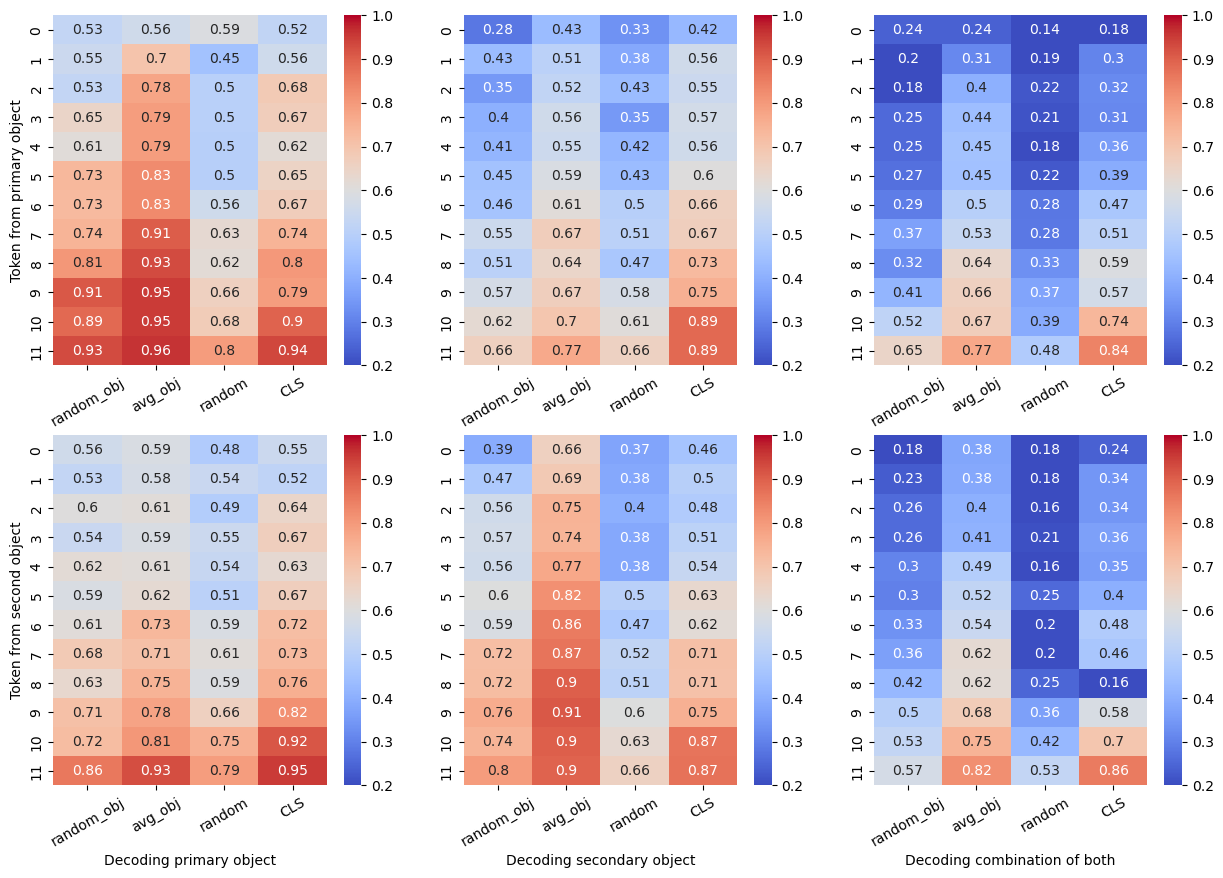

<Figure size 640x480 with 0 Axes>

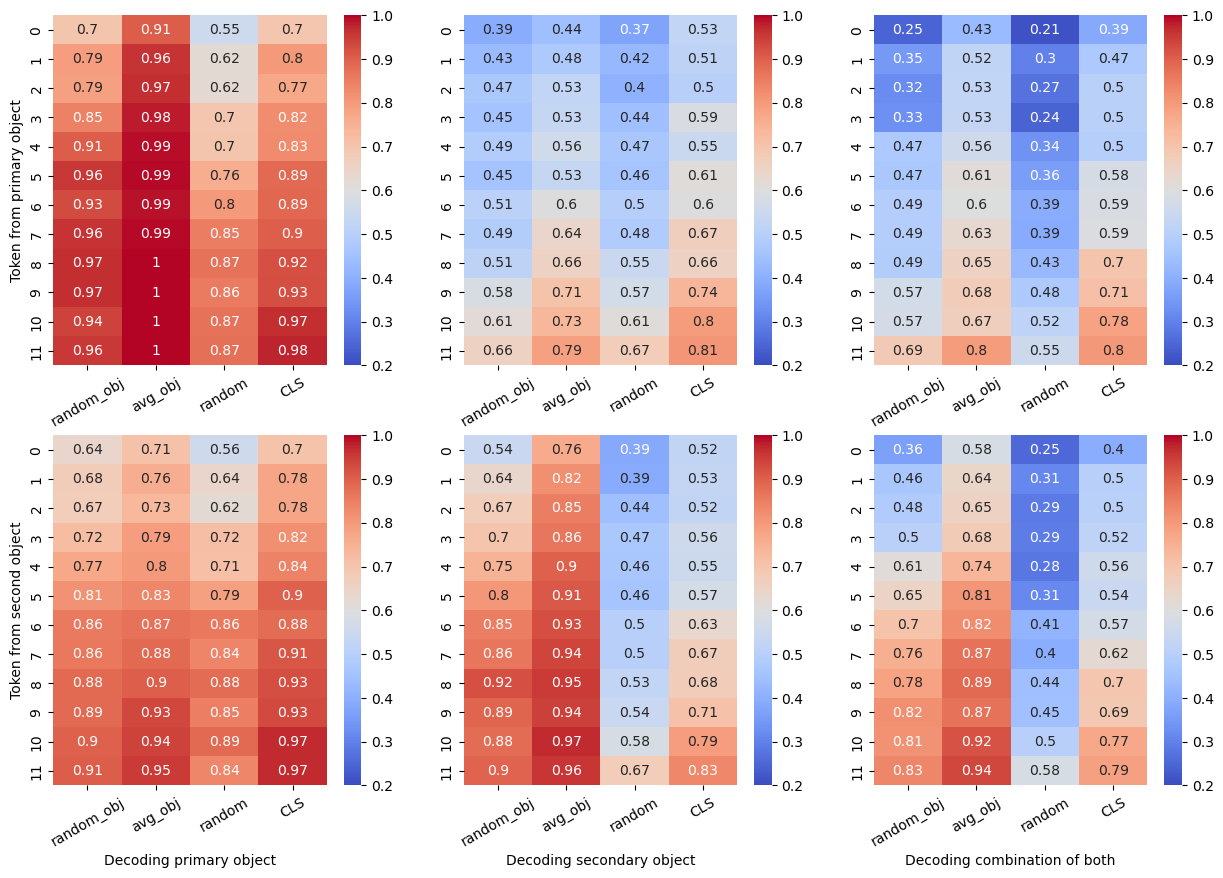

<Figure size 640x480 with 0 Axes>

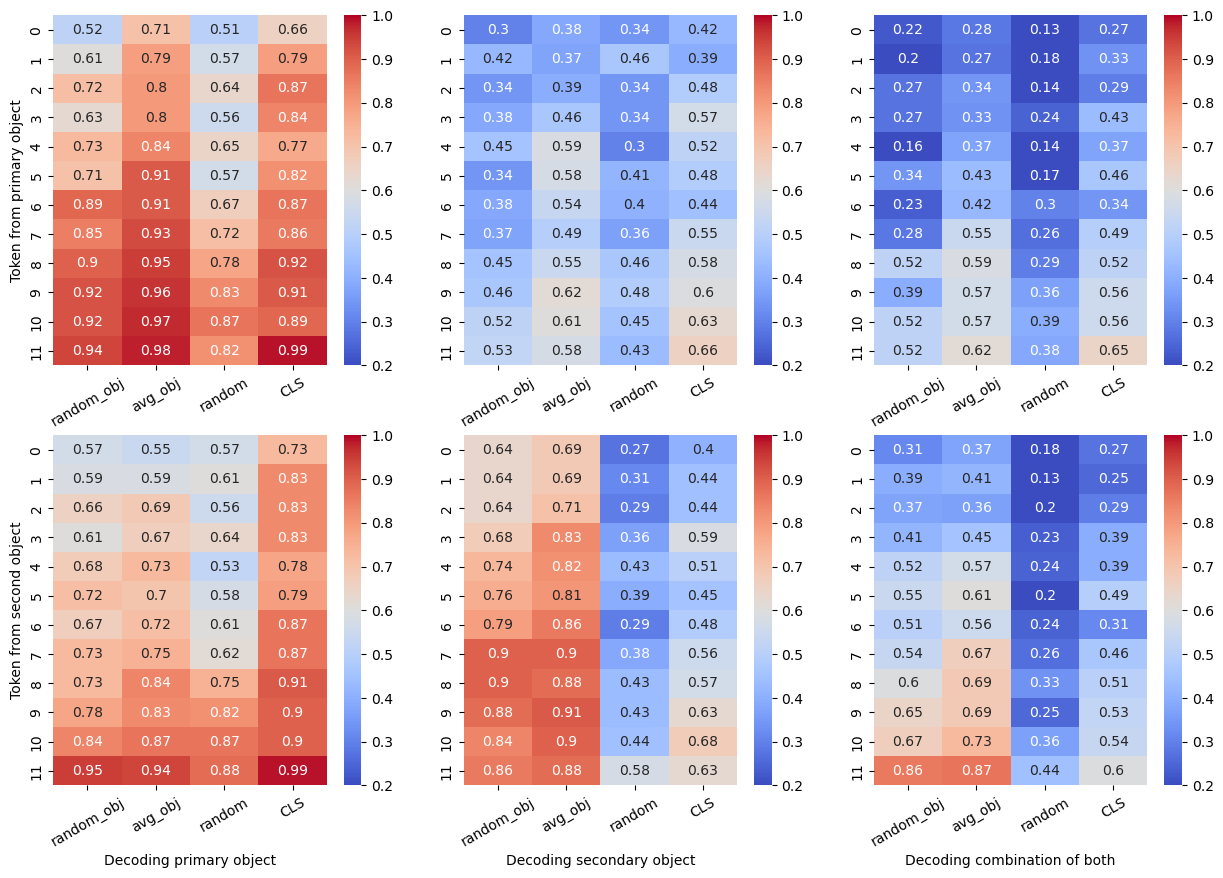

<Figure size 640x480 with 0 Axes>

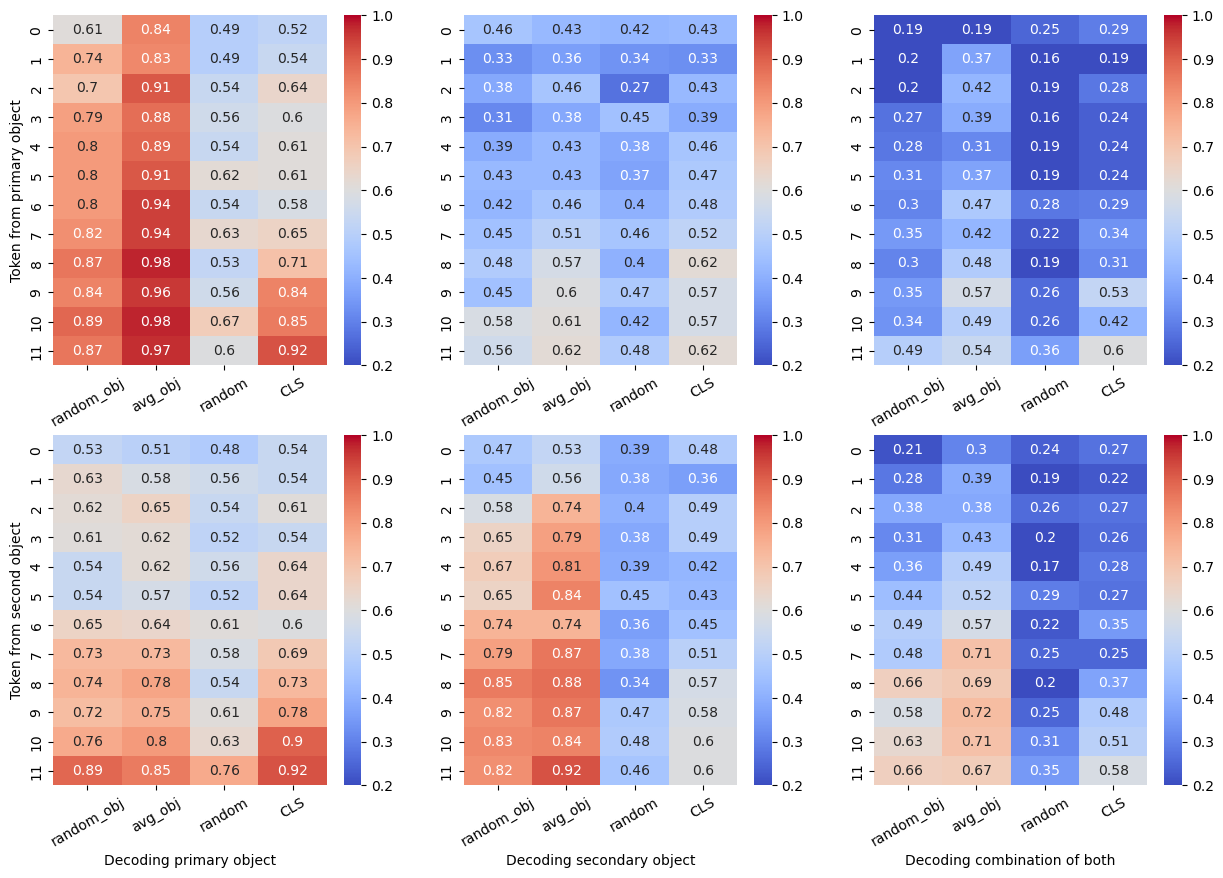

<Figure size 640x480 with 0 Axes>

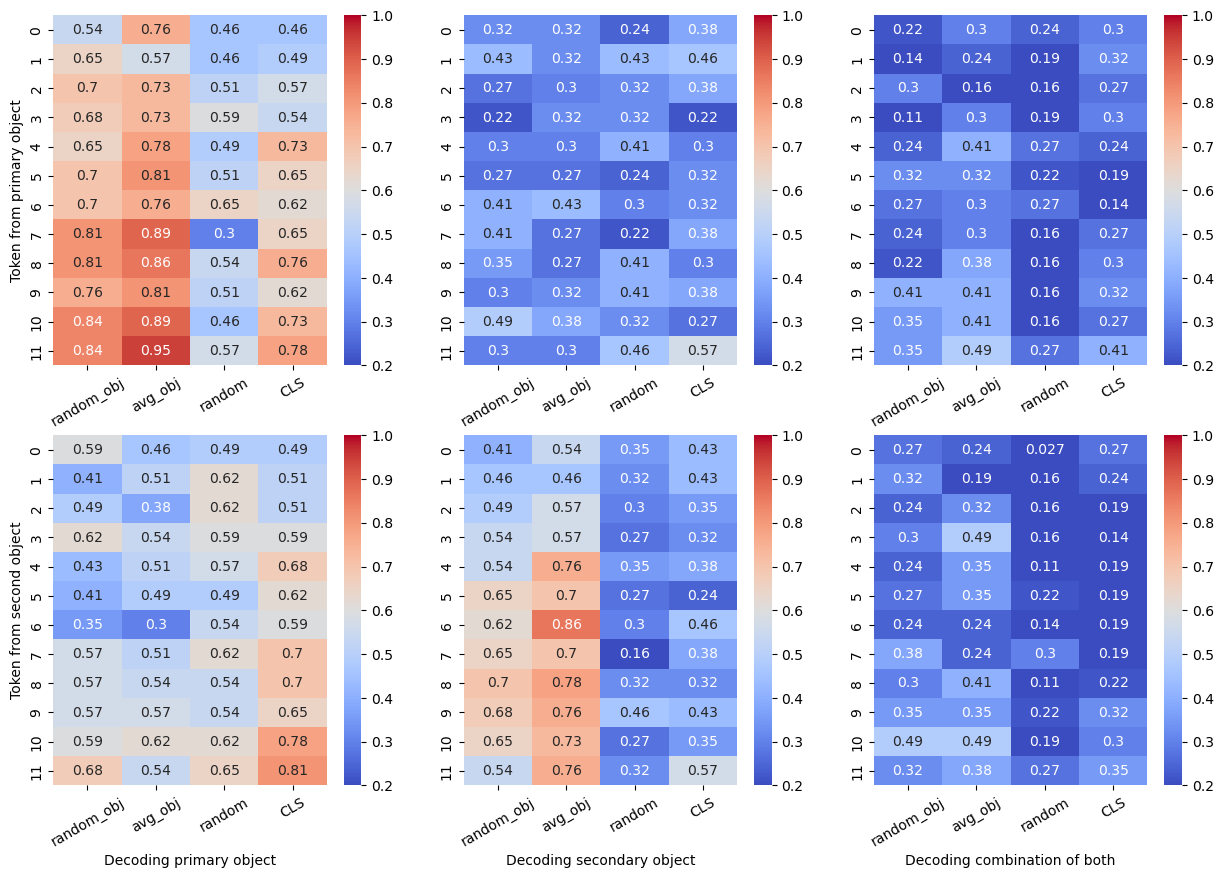

<Figure size 640x480 with 0 Axes>

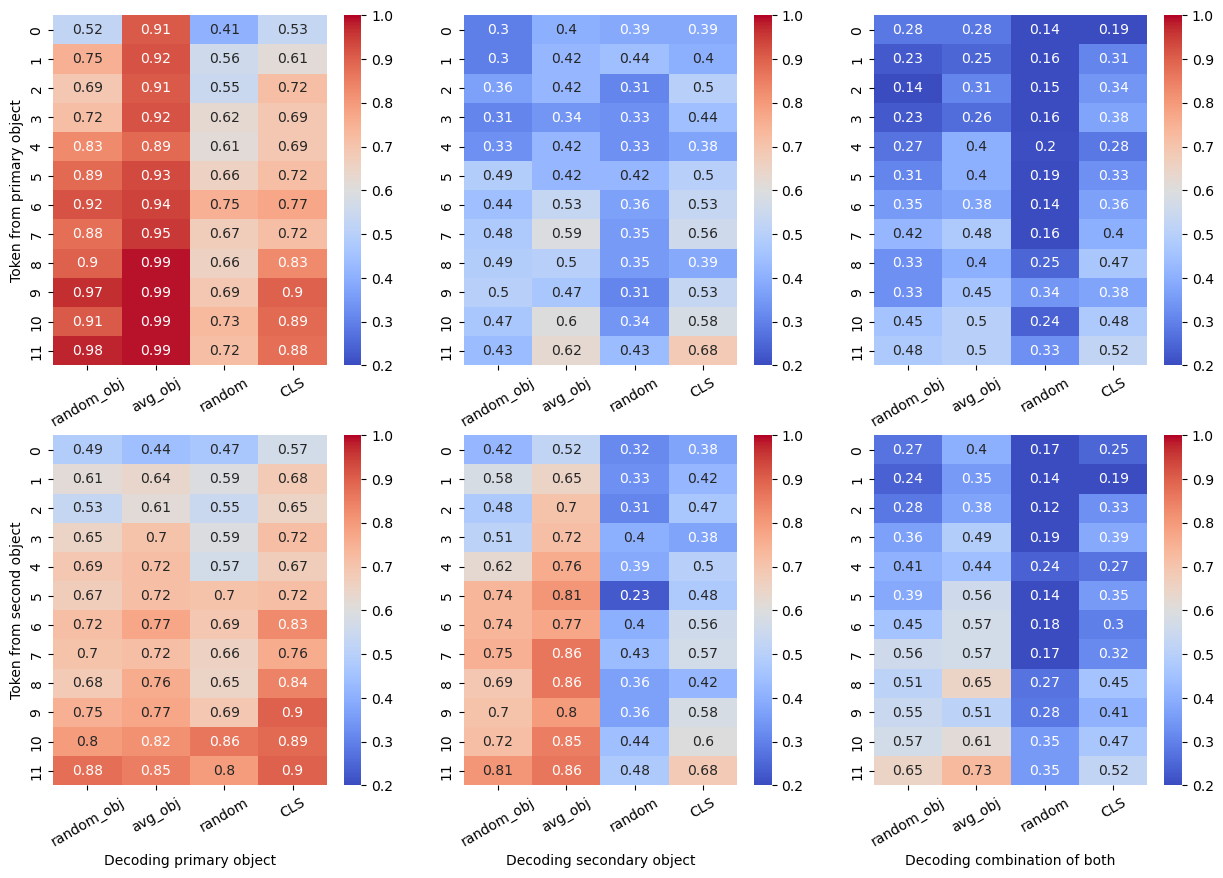

In [7]:
for task in range(6):
    plt.figure()
    with open('Results_Balanced_BLIP_MLP/task{}_results.pkl'.format(task),'rb') as f:
        results = pickle.load(f)
    fig, axs = plt.subplots(2, 3,figsize=(15, 10))
    for x in [1,2]:
        for y in [1,2,3]:
            table = np.zeros((len(layers),len(feature_type)))
            for i,l in enumerate(layers):
                for j,f in enumerate(feature_type):
                    table[i,j]= results[l][f][x][y]
            sns.heatmap(table,annot=True,ax = axs[x-1,y-1],vmin=0.20,vmax=1,cmap='coolwarm')
            axs[x-1,y-1].set_xticklabels(x_ticks,rotation=30)
            axs[1,y-1].set_xlabel(x_labels[y-1])
            axs[x-1,0].set_ylabel(y_labels[x-1])
            

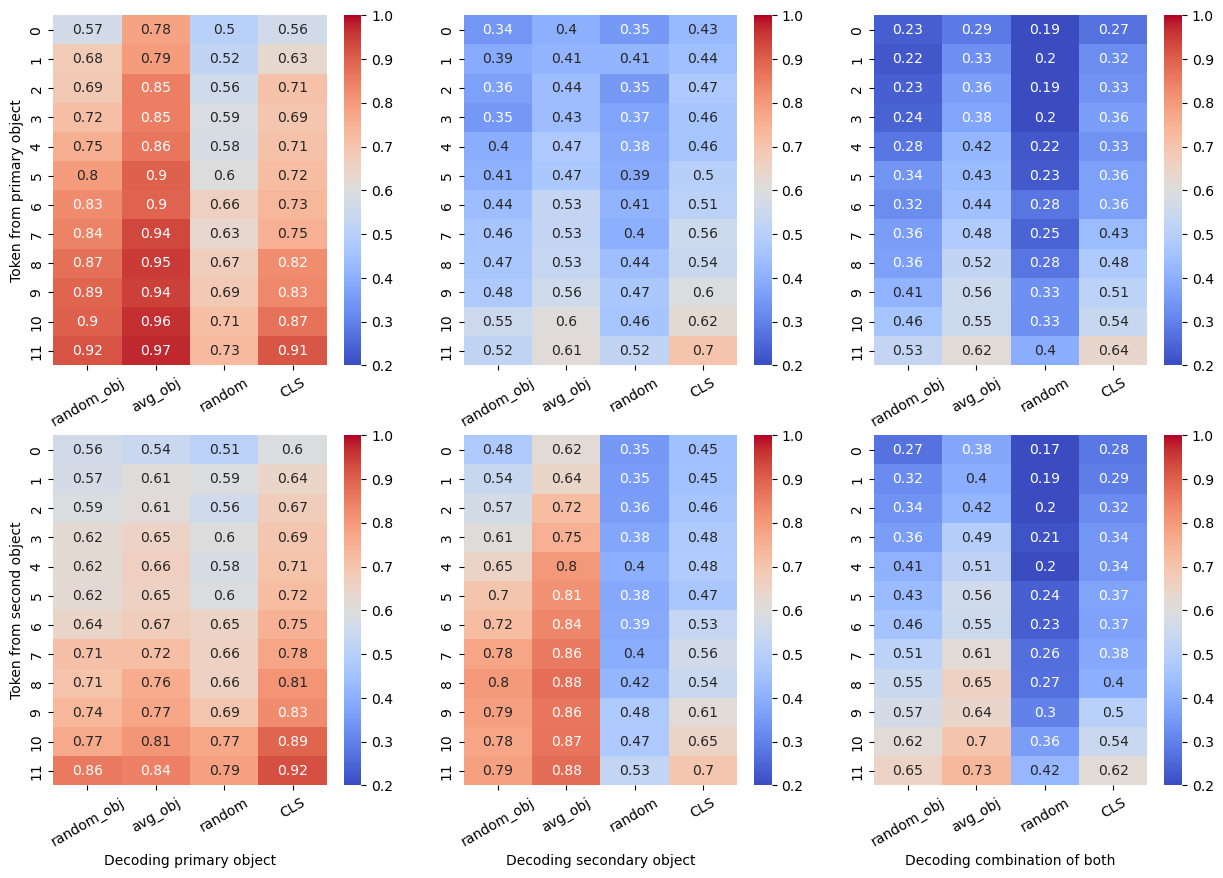

In [8]:
results= {}
for task in range(6):
    with open('Results_Balanced_BLIP_MLP/task{}_results.pkl'.format(task),'rb') as f:
        results[task] = pickle.load(f)
fig, axs = plt.subplots(2, 3,figsize=(15, 10))
for x in [1,2]:
    for y in [1,2,3]:
        table = np.zeros((len(layers),len(feature_type)))
        for i,l in enumerate(layers):
            for j,f in enumerate(feature_type):
                for task in range(6):
                    table[i,j]= table[i][j]+results[task][l][f][x][y]
                table[i,j]/=6
        sns.heatmap(table,annot=True,ax = axs[x-1,y-1],vmin=0.20,vmax=1,cmap='coolwarm')
        axs[x-1,y-1].set_xticklabels(x_ticks,rotation=30)
        axs[1,y-1].set_xlabel(x_labels[y-1])
        axs[x-1,0].set_ylabel(y_labels[x-1])